# Quality Prediction in Mining Process

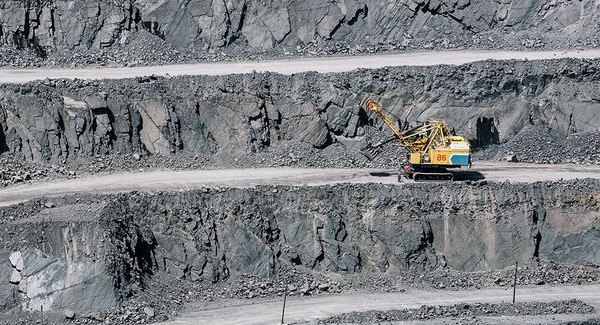

# Introduction

Here we create a model which will predict the purity of an ore using the various lab result values, done on a sample of that ore..

# Dataset

The dataset used in this project is take from the Kaggle website.
<br>
<b>Dataset Link:- https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process </b>
<br>
In this dataset there is a table which contains 24 columns and around 735000 rows.
<br>
<b>Some of the columns are:</b>% Iron Feed, % Silica Feed, Starch Flow, Ore Pulp Flow, Floatation columns and so on.

# Aim

The main aim is to build a model using various approaches that will be able to predict an ore's purity and impurity using the different column values as input.

# Approach

We will try to build the models using different algorithms of ML and DL and compare their accuracy. In this notebook we will be building models using Linear Regression, Decision Trees, Random Forest and Artificial Neural Networks.

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

In [2]:
#Loading the data
df = pd.read_csv("./MiningProcess_Flotation_Plant_Database.csv", 
                 decimal=",",
                 parse_dates=["date"],
                 infer_datetime_format=True).drop_duplicates()

## Exploratory Data Analysis

In [3]:
df.head(5)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:
df.dtypes

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

In [5]:
df.shape

(736282, 24)

In [6]:
#Checking for rows that have some null column values
df.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [7]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


 #### Let's see the distribution of Silica Concentrate

In [9]:
df['% Silica Concentrate'].describe()

count    736282.000000
mean          2.327270
std           1.125616
min           0.600000
25%           1.440000
50%           2.000000
75%           3.010000
max           5.530000
Name: % Silica Concentrate, dtype: float64

#### Let's see the distribution of Iron Concentrate

In [10]:
df["% Iron Concentrate"].describe()

count    736282.000000
mean         65.049096
std           1.118721
min          62.050000
25%          64.370000
50%          65.210000
75%          65.860000
max          68.010000
Name: % Iron Concentrate, dtype: float64

### Data Visualisation

In [11]:
plt.style.use("seaborn-darkgrid")
sns.set()

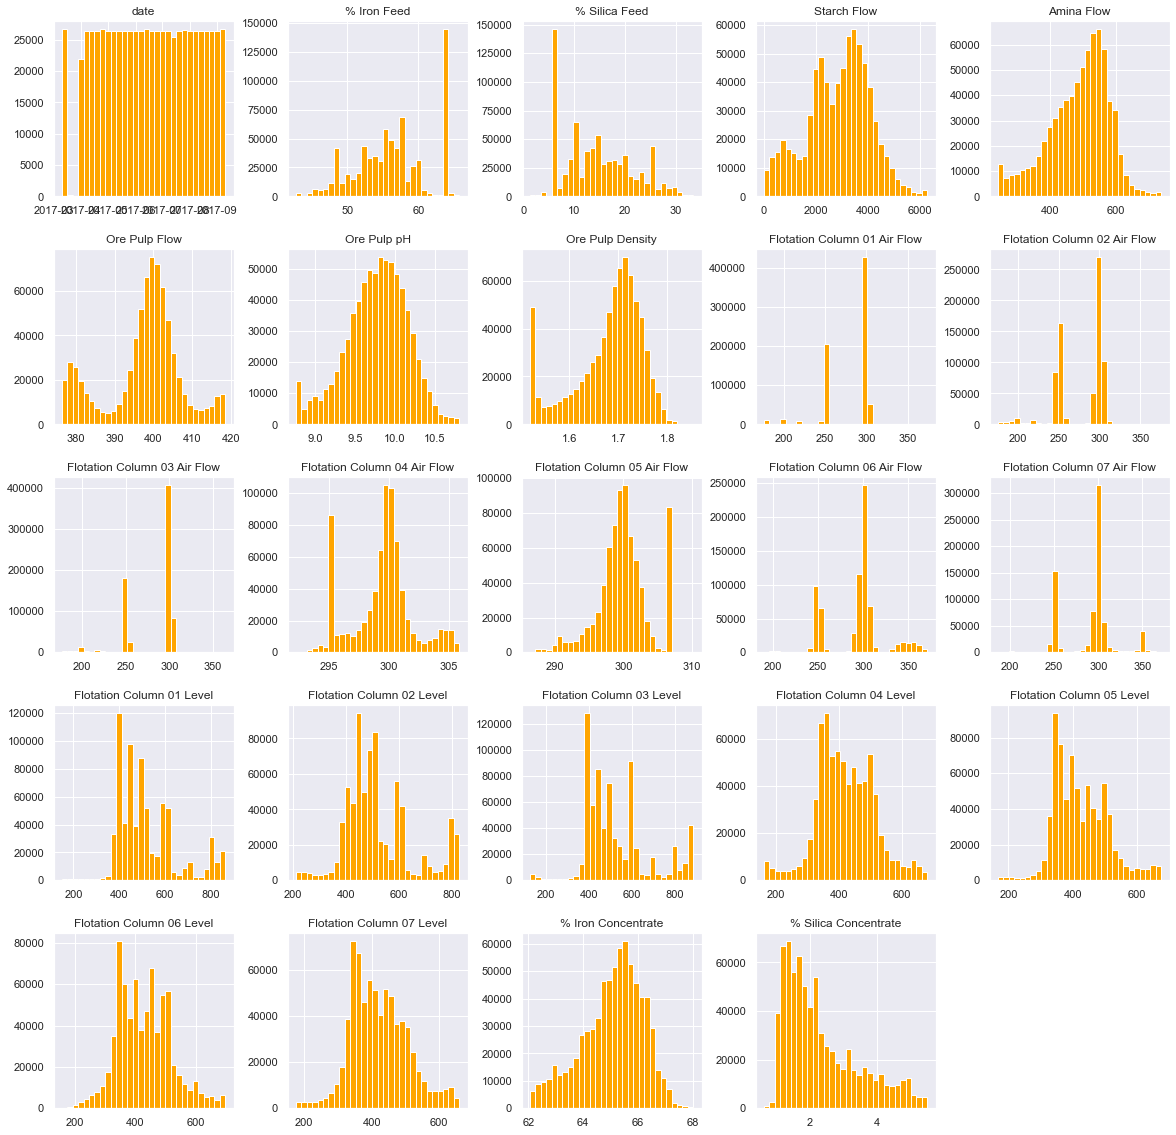

In [12]:
df.hist(bins=30, figsize=(20,20), color='orange')
plt.title("Histogram Plot of the Features")
plt.show()

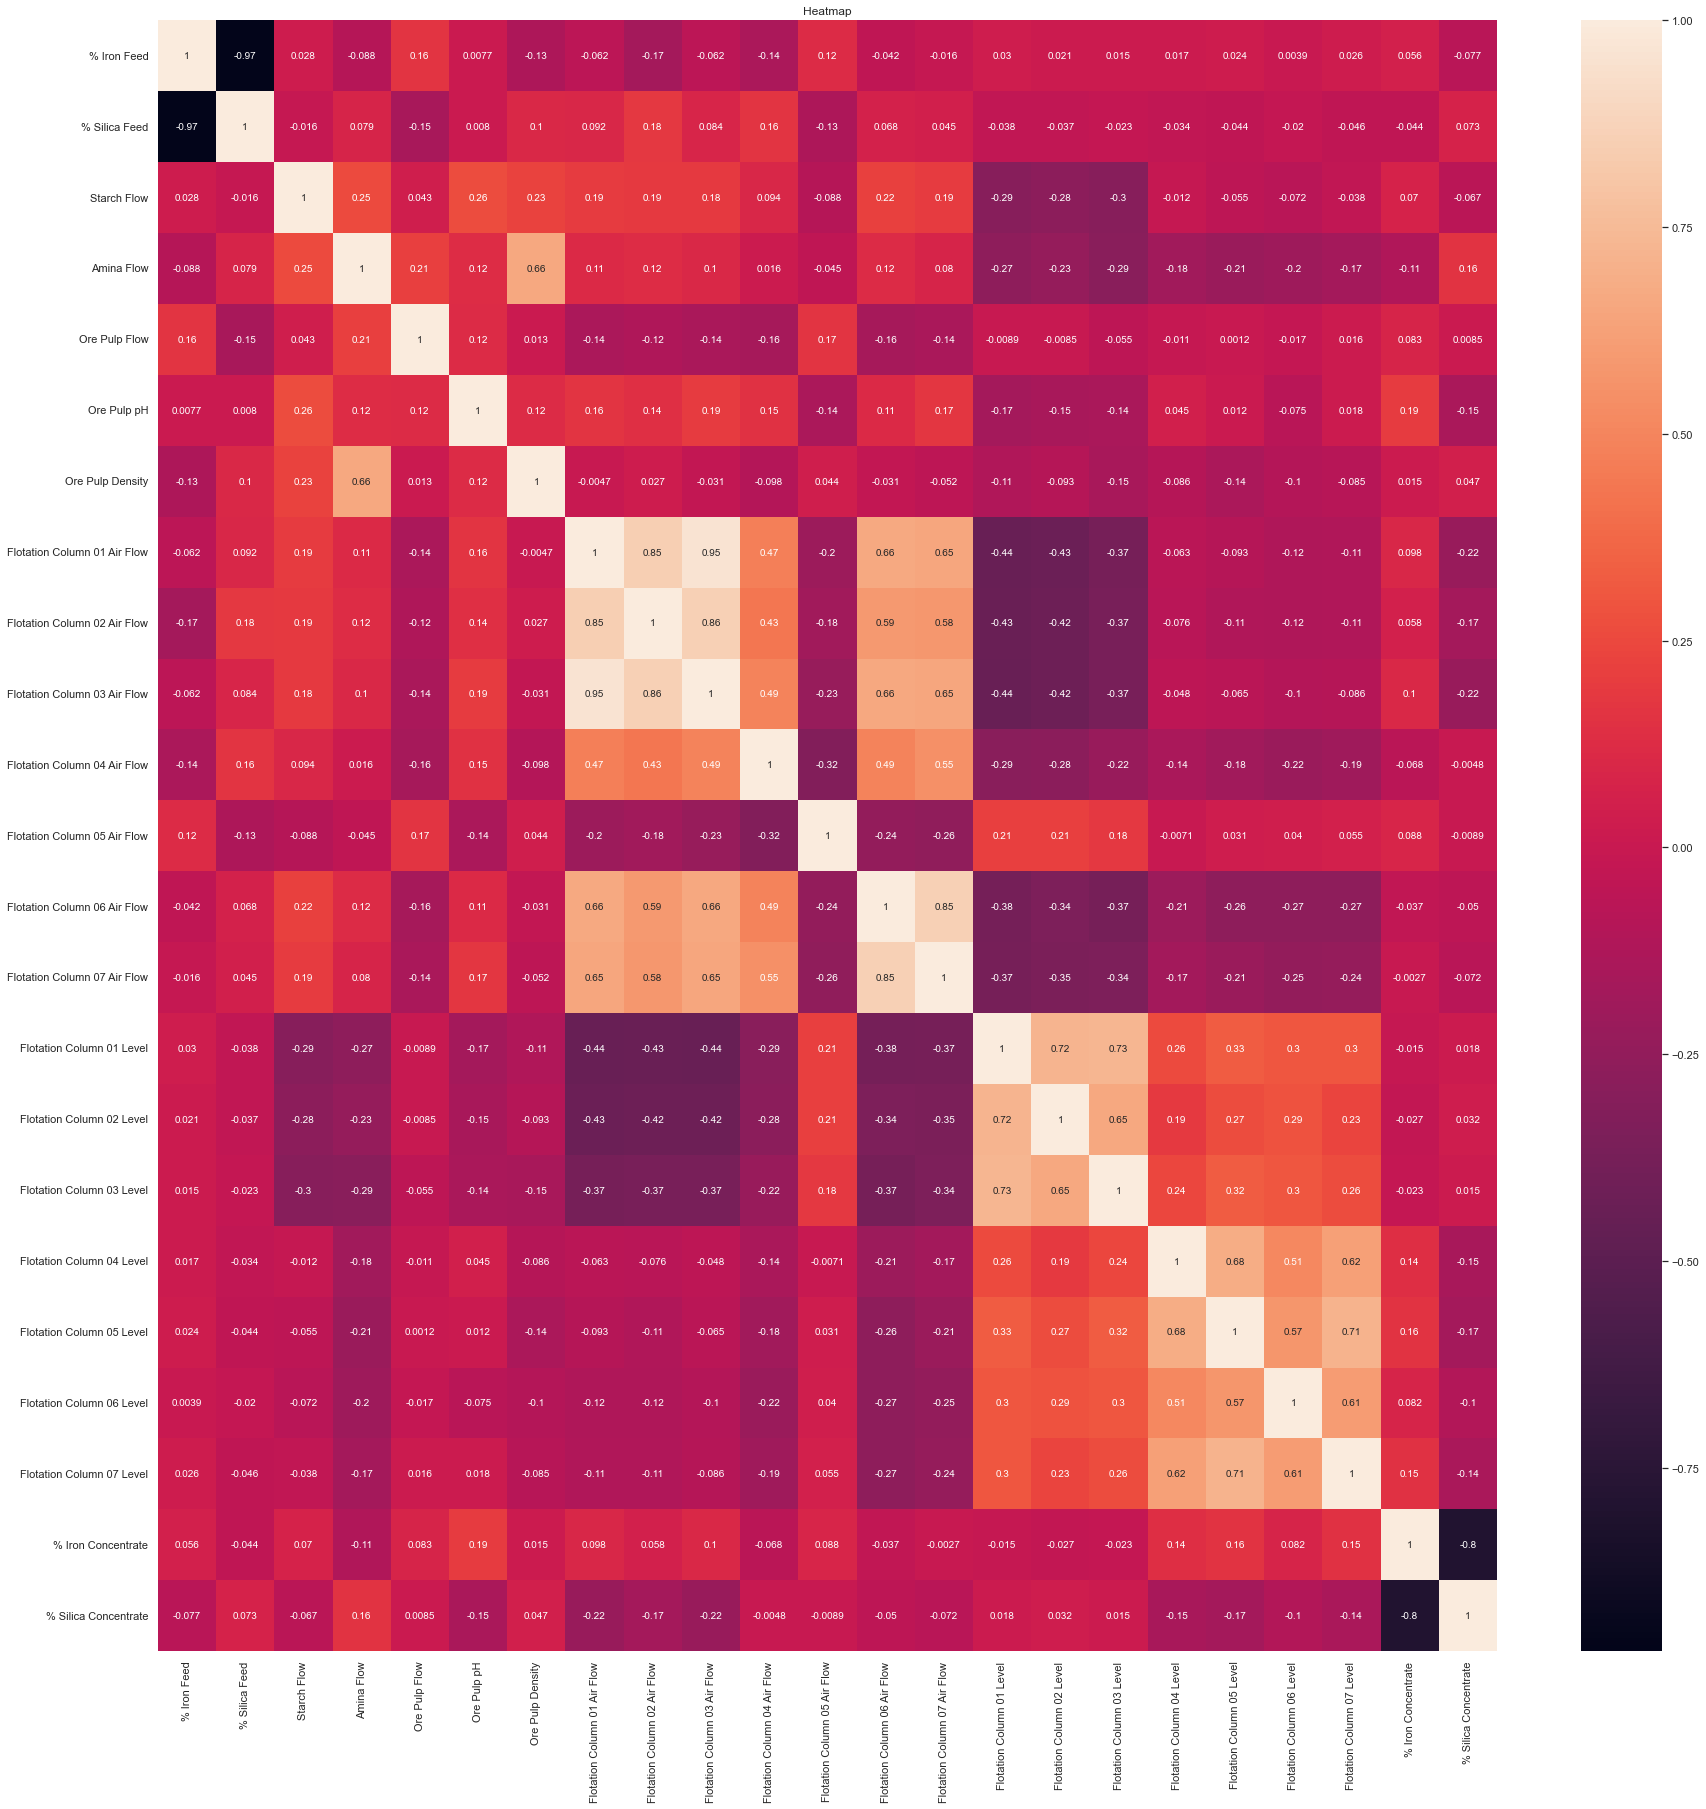

In [13]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap")
plt.show()

### We understand that there's a strong relationship between Iron Feed and Silica Feed also between % of Silica Concentrate and % of Iron Concentrate 

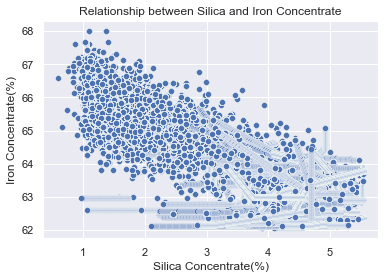

In [14]:
sns.scatterplot(x='% Silica Concentrate', y='% Iron Concentrate', data=df)
plt.xlabel('Silica Concentrate(%)')
plt.ylabel('Iron Concentrate(%)')
plt.title('Relationship between Silica and Iron Concentrate')
plt.show()

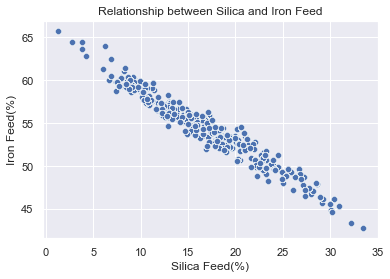

In [15]:
sns.scatterplot(x='% Silica Feed', y='% Iron Feed', data=df)
plt.xlabel('Silica Feed(%)')
plt.ylabel('Iron Feed(%)')
plt.title('Relationship between Silica and Iron Feed')
plt.show()

In [9]:
df["Flotation Column 01 Air Flow"].describe()

count    736282.000000
mean        280.119813
std          29.633831
min         175.510000
25%         250.278000
50%         299.341000
75%         300.147000
max         373.871000
Name: Flotation Column 01 Air Flow, dtype: float64

In [10]:
df["Flotation Column 04 Air Flow"].describe()

count    736282.000000
mean        299.446217
std           2.573805
min         292.195000
25%         298.257000
50%         299.804000
75%         300.635000
max         305.871000
Name: Flotation Column 04 Air Flow, dtype: float64

In [11]:
df["Flotation Column 07 Air Flow"].describe()

count    736282.000000
mean        290.740507
std          28.690520
min         185.962000
25%         256.047750
50%         299.002000
75%         301.907000
max         371.593000
Name: Flotation Column 07 Air Flow, dtype: float64

## Creating Training and Testing Dataset

In [16]:
df_iron = df.drop(columns = ['date', '% Silica Concentrate'])
df_iron_target = df['% Silica Concentrate']

In [17]:
df_iron.head(5)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91


In [18]:
df_iron_target.head(5)

0    1.31
1    1.31
2    1.31
3    1.31
4    1.31
Name: % Silica Concentrate, dtype: float64

In [19]:
df_iron.shape

(736282, 22)

In [20]:
df_iron_target.shape

(736282,)

In [21]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [22]:
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(736282, 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_iron, df_iron_target, test_size=0.25)
X_train.shape, X_test.shape

((552211, 22), (184071, 22))

### Scaling the data

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1. Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [25]:
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
lr_accuracy = linearRegression_model.score(X_test_scaled, y_test)
lr_accuracy

0.6764668331912541

In [31]:
# Another way to find accuracy
y_pred = linearRegression_model.predict(X_test_scaled)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6764668331912541

## 2. Decision Tree 

Decision trees are a type of model used for both classification and regression. Trees answer sequential questions which send us down a certain route of the tree given the answer. The model behaves with “if this than that” conditions ultimately yielding a specific result.

In [32]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [33]:
dt_accuracy = dt_model.score(X_test_scaled, y_test)
dt_accuracy

0.9940757481097025

## 3. Random Forest

 A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models.

In [34]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

C:\Users\ryan1\AppData\Local\Temp\ipykernel_17300\951587695.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1)

In [35]:
rf_model.score(X_test_scaled, y_test)

0.887134530809339

## 4. Artificial Neural Network

Artificial neural networks, usually simply called neural networks or neural nets, are computing systems inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

In [39]:
ANN_model = Sequential()
ANN_model.add(Dense(250, input_dim = 22, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(500,activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation = 'linear'))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 250)               5750      
                                                                 
 dense_5 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 1000)              501000    
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_7 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_3 (Dropout)         (None, 1000)             

In [40]:
history = ANN_model.fit(X_train_scaled, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
13806/13806 [==============================] - 1100s 80ms/step - loss: 0.2329 - val_loss: 0.1554
Epoch 2/5
13806/13806 [==============================] - 1247s 90ms/step - loss: 0.1411 - val_loss: 0.1089
Epoch 3/5
13806/13806 [==============================] - 1346s 97ms/step - loss: 0.1180 - val_loss: 0.0928
Epoch 4/5
13806/13806 [==============================] - 1468s 106ms/step - loss: 0.1045 - val_loss: 0.0871
Epoch 5/5
13806/13806 [==============================] - 1434s 104ms/step - loss: 0.0970 - val_loss: 0.0851


In [43]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

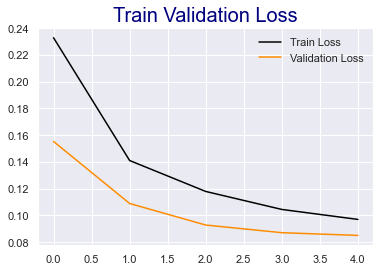

In [46]:
plt.title("Train Validation Loss", color="navy", size = 20)
plt.plot(history.history["loss"], label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"], label = "Validation Loss", color = "darkorange")
plt.legend()
plt.show()

In [47]:
eval = ANN_model.evaluate(X_test_scaled, y_test)

5753/5753 [==============================] - 141s 24ms/step - loss: 0.0844


### ANN model with different architecture

In [48]:
ann_model = Sequential()
ann_model.add(Dense(256, input_dim = 22, activation = 'relu'))
ann_model.add(Dense(512, activation = 'relu'))
ann_model.add(Dense(128, activation = 'relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(1, activation = 'linear'))

ann_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               5888      
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 203,265
Trainable params: 203,265
Non-trainable params: 0
_________________________________________________________________


In [50]:
ann_model.compile(
            loss='mse',
            optimizer='adam',
            metrics=['accuracy'])

In [51]:
ann_hist = ann_model.fit(X_train_scaled, y_train, epochs = 5, validation_split=0.2)

Epoch 1/5
13806/13806 [==============================] - 728s 53ms/step - loss: 0.2590 - accuracy: 0.0038 - val_loss: 0.1366 - val_accuracy: 0.0035
Epoch 2/5
13806/13806 [==============================] - 680s 49ms/step - loss: 0.1423 - accuracy: 0.0038 - val_loss: 0.1033 - val_accuracy: 0.0035
Epoch 3/5
13806/13806 [==============================] - 655s 47ms/step - loss: 0.1132 - accuracy: 0.0037 - val_loss: 0.0869 - val_accuracy: 0.0035
Epoch 4/5
13806/13806 [==============================] - 667s 48ms/step - loss: 0.0988 - accuracy: 0.0037 - val_loss: 0.0715 - val_accuracy: 0.0035
Epoch 5/5
13806/13806 [==============================] - 688s 50ms/step - loss: 0.0903 - accuracy: 0.0037 - val_loss: 0.0627 - val_accuracy: 0.0035


In [52]:
ann_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

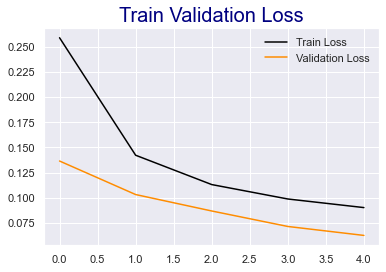

In [56]:
plt.title("Train Validation Loss", color="navy", size = 20)
plt.plot(ann_hist.history["loss"], label = "Train Loss", color = "black")
plt.plot(ann_hist.history["val_loss"], label = "Validation Loss", color = "darkorange")
plt.legend()
plt.show()

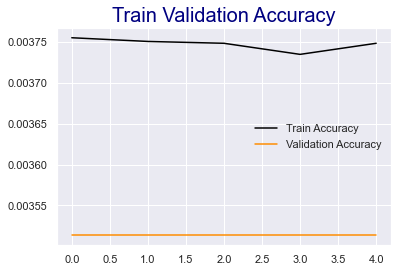

In [57]:
plt.title("Train Validation Accuracy", color="navy", size = 20)
plt.plot(ann_hist.history["accuracy"], label = "Train Accuracy", color = "black")
plt.plot(ann_hist.history["val_accuracy"], label = "Validation Accuracy", color = "darkorange")
plt.legend()
plt.show()

In [58]:
evaluate = ann_model.evaluate(X_test_scaled, y_test)

5753/5753 [==============================] - 109s 19ms/step - loss: 0.0624 - accuracy: 0.0035


## Observation

We have observed that:<br>
<i>Test Accuracy for Linear Regression model = <b>0.67646</b> <br>
Test Accuracy for Decision Tree model = <b>0.99407</b> <br>
Test Accuracy for Random Forest model = <b>0.88713</b> <br>
Test Accuracy for ANN model = <b>0.0037</b> <br>

### Key Notes:

<b>Loss can be seen as a distance between the true values of the problem and the values predicted by the model. Greater the loss is, more huge is the errors you made on the data.

<b>Accuracy can be seen as the number of error you made on the data.

That means:<br>
a low accuracy and huge loss means you made huge errors on a lot of data<br>
a low accuracy but low loss means you made little errors on a lot of data<br>
a great accuracy with low loss means you made low errors on a few data (best case)<br>
a great accuracy but a huge loss, means you made huge errors on a few data.

# Conclusion

We have solved the problem using four different approaches. The differences in the accuracies may be because of the model's architecture, optimizers used, loss functions used and so on. You can try changing these and observe how the model performs on your system.
<br>
The Decision Tree model seemed to have the highest accuracy in our case but Decision Tree's are also prone to Overfitting.